In [52]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import pandas as pd

In [54]:
DATA_FOLDER = "/home/icetenny/senior-1/Linemod_preprocessed/data/"
RESULT_FOLDER = "/home/icetenny/senior-1/SAM-6D/SAM-6D/Data/linemod-ism-eval-fastsam/sam6d_results/"

OBJ_IDS = [1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15]


In [55]:
def calculate_iou(mask1, mask2):
    # Convert masks to boolean arrays
    mask1 = mask1.astype(bool)
    mask2 = mask2.astype(bool)

    # Calculate intersection and union
    intersection = np.logical_and(mask1, mask2).sum()
    union = np.logical_or(mask1, mask2).sum()

    # Compute IoU
    iou = intersection / union if union != 0 else 0
    return iou

def compute_metrics(mask1, mask2):
    mask1 = mask1.astype(bool)
    mask2 = mask2.astype(bool)

    TP = np.logical_and(mask1, mask2).sum()
    FP = np.logical_and(~mask1, mask2).sum()
    FN = np.logical_and(mask1, ~mask2).sum()
    TN = np.logical_and(~mask1, ~mask2).sum()

    IoU = TP / (TP + FP + FN) if (TP + FP + FN) > 0 else 0
    Dice = (2 * TP) / (2 * TP + FP + FN) if (2 * TP + FP + FN) > 0 else 0
    Pixel_Accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0
    Precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    Recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    Specificity = TN / (TN + FP) if (TN + FP) > 0 else 0

    return {
        "IoU": IoU,
        "Dice": Dice,
        "Pixel Accuracy": Pixel_Accuracy,
        "Precision": Precision,
        "Recall": Recall,
        "Specificity": Specificity
    }


In [58]:
results_df = pd.DataFrame(columns=["Object", "NumImages", "IoU", "Dice", "Pixel Accuracy", "Precision", "Recall", "Specificity"])

for obj_id in OBJ_IDS:

    obj_id = str(obj_id).zfill(2)

    print("Evaluating OBJ:", obj_id)

    mean_metrics = {
        "IoU": [],
        "Dice": [],
        "Pixel Accuracy": [],
        "Precision": [],
        "Recall": [],
        "Specificity": []
    }

    num_images = len(os.listdir(os.path.join(DATA_FOLDER, obj_id, "mask")))

    for im_id in range(num_images):
        obj_id = str(obj_id).zfill(2)
        image_id = str(im_id).zfill(4)

        # Mask gt
        mask_gt_path = os.path.join(DATA_FOLDER, obj_id, "mask", f"{image_id}.png")
        mask_gt = cv2.imread(mask_gt_path, cv2.IMREAD_GRAYSCALE)

        npz_path = os.path.join(RESULT_FOLDER, obj_id, f"detection_ism_{image_id}.npz")
        results = np.load(npz_path)

        # Best score mask
        best_iou = -1
        best_mask = None
        for mask_pred in results['segmentation']:
            iou = calculate_iou(mask_pred, mask_gt)

            if best_iou < iou:
                best_iou = iou
                best_mask = mask_pred
        # best_idx = np.argmax(results['score'])
        # pred_mask = results['segmentation'][best_idx]
                
        metrics = compute_metrics(best_mask, mask_gt)

        # Append metrics to the respective lists
        for key in mean_metrics.keys():
            mean_metrics[key].append(metrics[key])
        # print(im_id, best_iou)


    # Calculate mean metrics
    mean_results = {key: np.mean(value) for key, value in mean_metrics.items()}

    # Add a new row to the DataFrame for the mean metrics
    results_df = results_df.append({"Object": obj_id, "NumImages": num_images, **mean_results}, ignore_index=True)


    # Print the mean results
    for metric, mean_value in mean_results.items():
        print(f"Mean {metric}: {mean_value:.6f}")

# Save to CSV
results_df.to_csv('ism_fastsam_eval.csv', index=False)

Evaluating OBJ: 01


/tmp/ipykernel_12020/3454233043.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Object": obj_id, "NumImages": num_images, **mean_metrics}, ignore_index=True)


Mean IoU: 0.873974
Mean Dice: 0.932111
Mean Pixel Accuracy: 0.999116
Mean Precision: 0.936448
Mean Recall: 0.928820
Mean Specificity: 0.999582
Evaluating OBJ: 02


/tmp/ipykernel_12020/3454233043.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Object": obj_id, "NumImages": num_images, **mean_metrics}, ignore_index=True)


Mean IoU: 0.814838
Mean Dice: 0.892922
Mean Pixel Accuracy: 0.993280
Mean Precision: 0.892837
Mean Recall: 0.907146
Mean Specificity: 0.996883
Evaluating OBJ: 04


/tmp/ipykernel_12020/3454233043.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Object": obj_id, "NumImages": num_images, **mean_metrics}, ignore_index=True)


Mean IoU: 0.763648
Mean Dice: 0.851480
Mean Pixel Accuracy: 0.994500
Mean Precision: 0.804253
Mean Recall: 0.945409
Mean Specificity: 0.995993
Evaluating OBJ: 05


/tmp/ipykernel_12020/3454233043.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Object": obj_id, "NumImages": num_images, **mean_metrics}, ignore_index=True)


Mean IoU: 0.849345
Mean Dice: 0.917586
Mean Pixel Accuracy: 0.995944
Mean Precision: 0.937261
Mean Recall: 0.900614
Mean Specificity: 0.998496
Evaluating OBJ: 06


/tmp/ipykernel_12020/3454233043.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Object": obj_id, "NumImages": num_images, **mean_metrics}, ignore_index=True)


Mean IoU: 0.835898
Mean Dice: 0.907654
Mean Pixel Accuracy: 0.998135
Mean Precision: 0.932278
Mean Recall: 0.889736
Mean Specificity: 0.999301
Evaluating OBJ: 08


/tmp/ipykernel_12020/3454233043.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Object": obj_id, "NumImages": num_images, **mean_metrics}, ignore_index=True)


Mean IoU: 0.855182
Mean Dice: 0.918430
Mean Pixel Accuracy: 0.995591
Mean Precision: 0.898066
Mean Recall: 0.949339
Mean Specificity: 0.996956
Evaluating OBJ: 09


/tmp/ipykernel_12020/3454233043.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Object": obj_id, "NumImages": num_images, **mean_metrics}, ignore_index=True)


Mean IoU: 0.888000
Mean Dice: 0.939973
Mean Pixel Accuracy: 0.998998
Mean Precision: 0.944663
Mean Recall: 0.936238
Mean Specificity: 0.999533
Evaluating OBJ: 10


/tmp/ipykernel_12020/3454233043.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Object": obj_id, "NumImages": num_images, **mean_metrics}, ignore_index=True)


Mean IoU: 0.893265
Mean Dice: 0.943385
Mean Pixel Accuracy: 0.997969
Mean Precision: 0.976764
Mean Recall: 0.913027
Mean Specificity: 0.999615
Evaluating OBJ: 11


/tmp/ipykernel_12020/3454233043.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Object": obj_id, "NumImages": num_images, **mean_metrics}, ignore_index=True)


Mean IoU: 0.819363
Mean Dice: 0.896992
Mean Pixel Accuracy: 0.995891
Mean Precision: 0.895800
Mean Recall: 0.906301
Mean Specificity: 0.998978
Evaluating OBJ: 12


/tmp/ipykernel_12020/3454233043.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Object": obj_id, "NumImages": num_images, **mean_metrics}, ignore_index=True)


Mean IoU: 0.850643
Mean Dice: 0.918636
Mean Pixel Accuracy: 0.997464
Mean Precision: 0.880664
Mean Recall: 0.961159
Mean Specificity: 0.998011
Evaluating OBJ: 13


/tmp/ipykernel_12020/3454233043.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Object": obj_id, "NumImages": num_images, **mean_metrics}, ignore_index=True)


Mean IoU: 0.839155
Mean Dice: 0.911677
Mean Pixel Accuracy: 0.994209
Mean Precision: 0.892992
Mean Recall: 0.931910
Mean Specificity: 0.996310
Evaluating OBJ: 14


/tmp/ipykernel_12020/3454233043.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Object": obj_id, "NumImages": num_images, **mean_metrics}, ignore_index=True)


Mean IoU: 0.839109
Mean Dice: 0.910996
Mean Pixel Accuracy: 0.993274
Mean Precision: 0.937752
Mean Recall: 0.890007
Mean Specificity: 0.997577
Evaluating OBJ: 15
Mean IoU: 0.783060
Mean Dice: 0.869097
Mean Pixel Accuracy: 0.995026
Mean Precision: 0.834322
Mean Recall: 0.929406
Mean Specificity: 0.996667


/tmp/ipykernel_12020/3454233043.py:55: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({"Object": obj_id, "NumImages": num_images, **mean_metrics}, ignore_index=True)


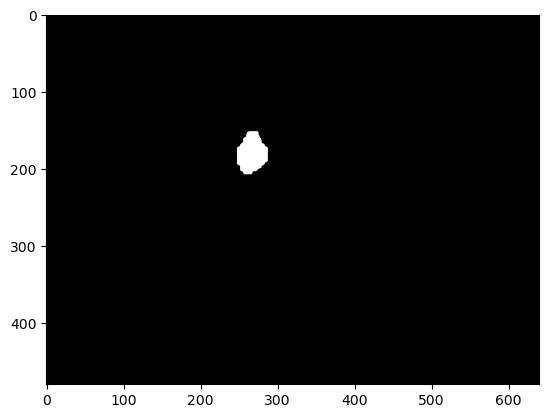

In [37]:
plt.figure()
plt.imshow(, cmap='gray')
plt.show()

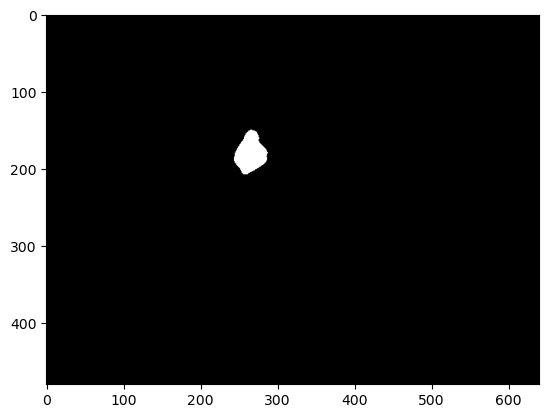

In [36]:
mask_gt = cv2.imread(mask_gt_path, cv2.IMREAD_GRAYSCALE)
plt.figure()
plt.imshow(mask_gt, cmap='gray')
plt.show()

In [39]:
unique_values, counts = np.unique(results['segmentation'][3], return_counts=True)
unique_values

array([0., 1.], dtype=float32)

In [41]:
calculate_iou(results['segmentation'][3], mask_gt)

0.8723404255319149